# Chapter 1
## Tensor decomposition

This section deals with a simple concept: to decompose a 2D matrix, so far, we have _vectorised_ it, i.e. we made a long thing vector of a rectangular matrix. What if we did not need to? Because we actually didn't. 

Tensor decomposition extends matrix decomposition to N-dimensional arrays, i.e. tensors. The principle is simple: if SVD decomposes a matrix $X$ into:

$$
X = \sum_{j=1}^{m} \sigma_j * U_j \circ V_j
$$

i.e. a sum of rank-1 matrices where $U_j$ and $V_j$ are a column and row vector respsectively, then we can certainly extend this to the 3 dimensional case, just by adding a outer product to a new vector (that captures the third dimension mode, e.g. time, if x and y are space)

$$
X = \sum_{j=1}^{m} \sigma_j * U_j \circ V_j \circ Z_j
$$

this is, again, the sum of rank 1 3D arrays (tensors). 

Let's see an example. Let's initialise the veriables `x`, `y` and `t` to represent a discretisation of the three domains our signals will be defined over.

In [1]:
x=-5:0.1:5;
y=-6:0.1:6;
t=0:0.1:(10*π);

Then let's create the matrix A (there's almost certainly a better way to generate `A`, i.e. one that does not use `repeat`, but this will do for now.)

In [2]:
X=repeat(x', length(y),1,length(t));
Y=repeat(y, 1, length(x),length(t));
T=repeat(reshape(t, 1,1,length(t)),length(y),length(x))

A=exp.(-(X.^2+0.5.*Y.^2)).*(cos.(2*T)).+ (sech.(X).*tanh.(X).*exp.(-0.2.*Y.^2)).*sin.(T);

Let's now compute the tensor decomposition.

In [3]:
using TensorDecompositions

F = candecomp(A, 2, (randn(size(y)[1], 2), randn(size(x)[1], 2), randn(size(t)[1], 2)))

┌ Info: initializing factor matrices...
└ @ TensorDecompositions /Users/v1fmenol/.julia/packages/TensorDecompositions/3BVk2/src/candecomp.jl:68
┌ Info: applying candecomp ALS method...
└ @ TensorDecompositions /Users/v1fmenol/.julia/packages/TensorDecompositions/3BVk2/src/candecomp.jl:71
ALS iterations 100%|████████████████████████████████████| Time: 0:00:06
┌ Warning: Maximum number 100 of iterations exceeded.
└ @ TensorDecompositions /Users/v1fmenol/.julia/packages/TensorDecompositions/3BVk2/src/utils.jl:234


CANDECOMP{Float64, 3}(([6.228806681474085e-10 1.883978230272016e-5; 1.120977681582517e-9 2.3902204998472342e-5; … ; 1.120977681582517e-9 2.3902204998472342e-5; 6.228806681474085e-10 1.883978230272016e-5], [-4.36545162310704e-7 -0.0006830125927905352; -4.824412270531985e-7 -0.0007548228925794011; … ; 4.824454442869331e-7 0.0007548228925806547; 4.3654672933647295e-7 0.0006830125927910008], [0.004978640584080578 -2.1705601212155395e-6; 0.004879202637258174 0.000497036804396233; … ; 0.004845651221217488 -0.0005804442966390995; 0.004976146450849521 -8.179829582461732e-5]), [89242.37557152897, 156352.89754570997], Dict{Symbol, Any}())

Let's then plot the 3 eigenmodes for each dimension.

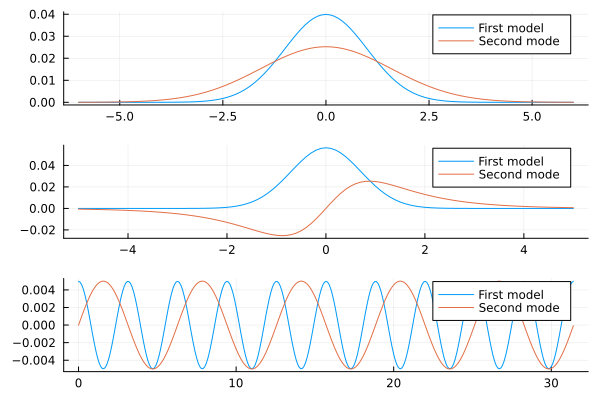

In [15]:
using Plots
gr()

plot(
    plot(y, F.factors[1], label=["First mode" "Second mode"]),
    plot(x, F.factors[2], label=["First mode" "Second mode"]),
    plot(t, F.factors[3], label=["First mode" "Second mode"]),
    layout=(3, 1)
)

Which is exactly what we expected: the first set of two modes (along the original y direction) are Gaussian as prescribed. The second set of two modes (along the original x direction) include a Gaussian for the first function, and the anti-symmetric $\mathrm{sech}(x)\;\mathrm{tanh}(x)$ for the second function. The third set of two modes correspond to the time dynamics of the two functions: $\mathrm{cos}(2t)$ and $\mathrm{sin}(t)$, respectively. Thus, the two factor model produced by the CP tensor decomposition returns the expected, low-rank functions that produced the high- dimensional data matrix A.